# 1. import libray
## (1) numpy --> 모델 구현 & 실행
## (2) matplotlib --> 결과 보여주기
## (3) torch --> data loading

In [1]:
import numpy as np

import matplotlib.pyplot as plt

import torch
import torchvision.datasets as dset
import torchvision.transforms as transforms

# 2. model 정의
## model: 4개의 layer
### (1) 입력층: x, 28*28
### (2) 1st hidden: h1, 256
### (3) 2nd hidden: h2, 2128
### (4) 출력층: y_hat, 10 (0~9)까지의 숫자를 의미)

## parameter: 3개의 parameter group
### (1) W1, b1: x와 h1을 연결: 28*28 --> 256
### (2) W2, b2: h1와 h2을 연결: 256 --> 128
### (3) W3, b3: h2와 y_hat을 연결: 128 --> 1

In [2]:
class myMLP:
    def __init__(self, n_input, n_hidden1, n_hidden2, n_output) -> None:
        self.W1 = np.zeros((n_hidden1, n_input), dtype=np.float32)
        self.b1 = np.zeros ((n_hidden1, ), dtype=np. float32)

        self.W2 = np.zeros((n_hidden2, n_hidden1), dtype=np.float32)
        self.b2 = np.zeros ((n_hidden2, ), dtype=np.float32)

        self.W3 = np.zeros((n_output, n_hidden2), dtype=np.float32)
        self.b3 = np.zeros ((n_output, ), dtype=np.float32)

    def __call__(self, x):
        x = x.reshape(-1)

        h1 = sigmoid(np.dot(self.W1, x) + self.b1)
        h2 = np.dot(self.W2, h1) + self.b2
        y_hat = np.dot(self.W3, h2) + self.b3

        return softmax(y_hat)

# 3. 함수 정의

## (1) sigmoid
## (2) softmax

In [3]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def softmax(x):
    ex = np.exp(x)
    return ex / np.sum(ex)

# 4. model 선언

In [4]:
model = myMLP(28*28, 256, 128, 10)

print(model.W1.shape, model.b1.shape)
print(model.W2.shape, model.b2.shape)
print(model.W3.shape, model.b3.shape)

(256, 784) (256,)
(128, 256) (128,)
(10, 128) (10,)


# 5. mnist data loading

## data loading --> dset

In [5]:
mnist_test = dset.MNIST("../data", train=False, transform=transforms.ToTensor(), target_transform=None, download=True)
print(len(mnist_test))

10000


# 6. data 확인

## mnist dataset은 필기체 숫자 영상 (28x28)과 label의 쌍

이미지 크기: torch.Size([1, 28, 28])
label: 7
torch.FloatTensor


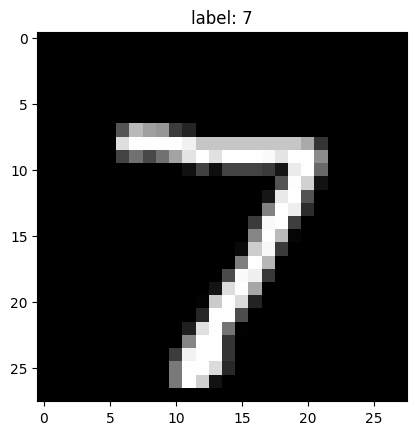

In [6]:
image, label = mnist_test[0]
print("이미지 크기:", image.size())
print("label:", label)

print(image.type())
img  = image.numpy()
plt.title('label: %d' % label)
plt.imshow(img[0], cmap="gray")
plt.show()

# 7. 훈련 --> parameter loading

## mlp_weight.npz

In [7]:
weights = np.load('../data/mlp_weight.npz')
model.W1 = weights['W1']
model.b1 = weights['b1']
model.W2 = weights['W2']
model.b2 = weights['b2']
model.W3 = weights['W3']
model.b3 = weights['b3']

# 8. 실행
## 올바른 예측의 수를 측정 --> mysum
### y_hat과 label이 같으면 올바른 예측
## 전체 데이터의 수 --> cnt
## 정확도: (mysum/cnt) * 100

In [8]:
mysum = 0
cnt = 0
m = len(mnist_test)

for i in range(m):
    # i번째 데이터를 추출
    image, label = mnist_test[i]

    # data --> y_hat을 계산
    y_hat = model(image)

    # cnt를 1 증가 (읽어들인 데이터 수 증가)
    cnt += 1

    # mysum은 예측이 맞으면 1 증가 --> y_hat의 index를 찾는 함수 --> argmax함수 --> > np.argmax(y_hat)== label?
    mysum += (np.argmax(y_hat) == label)

print(mysum/cnt * 100)

91.91
